In [1]:
flow_packets = []
with open("../../datasets/output/pcap_indexes_run_index.txt") as file:
    for line in file:
        indexes = line.strip().split(",")
        if len(indexes[-1]) == 0:
            indexes = indexes[:-1]
        indexes = [int(x) for x in indexes]
        flow_packets.append(indexes)

In [5]:
flow_packets[0]

[11457, 11463]

In [15]:
full_to_test_mapping = {}
with open("../../datasets/output/test_pcap_index_mapping.txt") as file:
    for line in file:
        before, after = line.strip().split(",")
        before = int(before)
        after = int(after)
        assert before not in full_to_test_mapping
        full_to_test_mapping[before] = after

full_to_test_mapping

{6272410: 0,
 6272411: 1,
 6272413: 2,
 6272415: 3,
 6272416: 4,
 6272417: 5,
 6272418: 6,
 6272419: 7,
 6272420: 8,
 6272421: 9,
 6272422: 10,
 6272423: 11,
 6272424: 12,
 6272425: 13,
 6272426: 14,
 6272427: 15,
 6272428: 16,
 6272429: 17,
 6272430: 18,
 6272431: 19,
 6272432: 20,
 6272433: 21,
 6272434: 22,
 6272435: 23,
 6272436: 24,
 6272437: 25,
 6272438: 26,
 6272439: 27,
 6272440: 28,
 6272441: 29,
 6272442: 30,
 6272443: 31,
 6272444: 32,
 6272445: 33,
 6272446: 34,
 6272447: 35,
 6272448: 36,
 6272449: 37,
 6272450: 38,
 6272451: 39,
 6272452: 40,
 6272453: 41,
 6272454: 42,
 6272455: 43,
 6272456: 44,
 6272457: 45,
 6272458: 46,
 6272459: 47,
 6272460: 48,
 6272461: 49,
 6272462: 50,
 6272463: 51,
 6272464: 52,
 6272465: 53,
 6272466: 54,
 6272467: 55,
 6272468: 56,
 6272469: 57,
 6272470: 58,
 6272471: 59,
 6272472: 60,
 6272473: 61,
 6272474: 62,
 6272475: 63,
 6272476: 64,
 6272477: 65,
 6272478: 66,
 6272479: 67,
 6272480: 68,
 6272481: 69,
 6272482: 70,
 6272483: 71,
 6

In [19]:
test_flow_packets = []
for cur_packets in flow_packets:
    new_packets = []
    is_in_test = True

    debug_partial = False
    for idx in cur_packets:
        if idx not in full_to_test_mapping:
            is_in_test = False
            if debug_partial:
                print("PARTIAL")
            break
        debug_partial = True
        new_packets.append(full_to_test_mapping[idx])
    if is_in_test:
        test_flow_packets.append(new_packets)
    else:
        test_flow_packets.append(None)

In [31]:
import pandas as pd
import numpy as np

In [34]:
test_flow_packets_set = [set(i) if i is not None else None for i in test_flow_packets]
test_flow_packets_set

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [57]:
np_test_flow_packets_set = pd.Series(np.array(test_flow_packets_set))
flow_packets_set_test_only = np_test_flow_packets_set[~np_test_flow_packets_set.isna()]
flow_packets_set_test_only

15397                                           {1146, 1495}
15431                                           {2688, 2693}
15432                                           {2689, 2690}
15433                                           {2697, 2691}
15434                                           {2698, 2694}
                                 ...                        
1045545    {2642276, 2642557, 2640528, 2644013, 2644014, ...
1045550                 {2561688, 2561683, 2561684, 2561687}
1045559                                   {1634169, 1634167}
1045580                                   {1799753, 1799750}
1045585                 {2248992, 2248993, 2248996, 2248997}
Length: 154294, dtype: object

In [58]:
with open("./detected_ksql_2_slowloris.txt") as file:
    detected_idxs = [int(x.strip()) for x in file.readlines()]
detected_idx_set = set(detected_idxs)
detected_idx_set

{1978804,
 1978805,
 1978811,
 1978812,
 1978815,
 1978816,
 1978818,
 1978826,
 1978829,
 1978831,
 1978834,
 1978835,
 1978838,
 1978840,
 1978843,
 1978845,
 1978846,
 1978848,
 1978849,
 1978854,
 1978857,
 1978858,
 1978864,
 1978865,
 1978868,
 1978871,
 1978872,
 1978873,
 1978877,
 1978879,
 1978880,
 1978881,
 1978884,
 1978886,
 1978887,
 1978890,
 1978891,
 1978894,
 1978896,
 1978897,
 1978899,
 1978902,
 1978903,
 1978907,
 1978909,
 1978910,
 1978911,
 1978914,
 1978915,
 1978918,
 1978919,
 1978922,
 1978923,
 1978927,
 1978928,
 1978929,
 1978932,
 1978933,
 1978937,
 1978938,
 1978942,
 1978943,
 1978945,
 1978948,
 1978949,
 1978953,
 1978954,
 1978955,
 1978958,
 1978960,
 1978961,
 1978964,
 1978965,
 1978968,
 1978970,
 1978972,
 1978976,
 1978977,
 1978978,
 1978979,
 1978981,
 1978986,
 1978987,
 1978988,
 1978989,
 1978992,
 1978994,
 1978995,
 1978998,
 1978999,
 1979002,
 1979004,
 1979006,
 1979007,
 1979010,
 1979012,
 1979014,
 1979016,
 1979018,
 1979020,


In [64]:
is_detected = np.array([len(detected_idx_set.intersection(flow_packet_set)) > 0 for flow_packet_set in flow_packets_set_test_only.values])
is_detected = pd.Series(is_detected)
is_detected

0         False
1         False
2         False
3         False
4         False
          ...  
154289    False
154290    False
154291     True
154292     True
154293    False
Length: 154294, dtype: bool

In [67]:
is_detected.index = flow_packets_set_test_only.index

In [68]:
is_detected

15397      False
15431      False
15432      False
15433      False
15434      False
           ...  
1045545    False
1045550    False
1045559     True
1045580     True
1045585    False
Length: 154294, dtype: bool

In [69]:
flink_test = pd.read_csv('../../datasets/output/test_final.csv', index_col=0)
flink_test

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Idle Max,Idle Min,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label,Old Index
Flow ID,,,,,,,,,,,,,,,,,,,,,
67fe01c7-f0d3-40ae-9734-11b87bbad3bd,192.168.10.14,51104,93.184.216.180,443,6,2017-07-05 13:05:56.267121,85742.0,10,6,527.0,...,0.0,0.0,0,0,0,0,0,85742,Benign,748588
8ae50662-7e0b-4ead-8e28-239831b9ef68,192.168.10.51,47817,162.213.33.48,443,6,2017-07-05 13:05:56.893194,1038445.0,10,12,703.0,...,0.0,0.0,0,0,0,0,0,1038445,Benign,499043
25b06579-d96c-48a0-a51d-7a430954b846,192.168.10.14,51114,178.255.83.1,80,6,2017-07-05 13:05:57.976332,70672.0,5,5,429.0,...,0.0,0.0,0,0,1,0,1,70672,Benign,855901
9e187a13-ffe2-4a44-8a8c-b624bc5b770d,192.168.10.14,51122,63.251.85.32,443,6,2017-07-05 13:05:58.340753,217279.0,9,11,2246.0,...,0.0,0.0,0,0,1,0,1,217279,Benign,936128
5edd0384-aa65-487b-b9e5-33ebc63cbe0f,192.168.10.14,51121,63.251.85.32,443,6,2017-07-05 13:05:58.340662,219470.0,8,8,545.0,...,0.0,0.0,0,0,1,0,1,219470,Benign,708939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007ea08-91f4-4f7e-88bb-2028c6a83115,192.168.10.50,55577,192.168.10.3,53,17,2017-07-07 19:19:22.247120,150.0,2,2,46.0,...,0.0,0.0,0,0,0,0,0,150,Benign,626458
f94bf22a-875b-4e88-ad42-ffae18afde65,192.168.10.50,46067,192.168.10.3,53,17,2017-07-07 19:19:22.246796,195.0,2,2,46.0,...,0.0,0.0,0,0,0,0,0,195,Benign,577996
f62720f2-cdfe-4fa3-b54e-530f595e0007,192.168.10.50,60990,192.168.10.3,53,17,2017-07-07 19:19:22.247401,176.0,2,2,46.0,...,0.0,0.0,0,0,0,0,0,176,Benign,578218


In [92]:
set(flink_test['Old Index'].values).issubset(set(is_detected.index))

True

In [96]:
is_detected

15397      False
15431      False
15432      False
15433      False
15434      False
           ...  
1045545    False
1045550    False
1045559     True
1045580     True
1045585    False
Length: 154294, dtype: bool

In [118]:
is_detected_df = pd.DataFrame(is_detected, columns=['Binary Prediction']).reset_index().rename(columns={'index': 'Old Index'})
is_detected_df['Binary Prediction'] = np.where(is_detected_df['Binary Prediction'], 'Slowloris', 'Not Slowloris')
is_detected_df

,Old Index,Binary Prediction
0,15397,Not Slowloris
1,15431,Not Slowloris
2,15432,Not Slowloris
3,15433,Not Slowloris
4,15434,Not Slowloris
...,...,...
154289,1045545,Not Slowloris
154290,1045550,Not Slowloris
154291,1045559,Slowloris
154292,1045580,Slowloris


In [128]:
left_merge = flink_test.merge(is_detected_df, on=['Old Index'], how='left', indicator=True)
left_merge

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,ICMP Code,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label,Old Index,Binary Prediction,_merge
0,192.168.10.14,51104,93.184.216.180,443,6,2017-07-05 13:05:56.267121,85742.0,10,6,527.0,...,0,0,0,0,0,85742,Benign,748588,Not Slowloris,both
1,192.168.10.51,47817,162.213.33.48,443,6,2017-07-05 13:05:56.893194,1038445.0,10,12,703.0,...,0,0,0,0,0,1038445,Benign,499043,Not Slowloris,both
2,192.168.10.14,51114,178.255.83.1,80,6,2017-07-05 13:05:57.976332,70672.0,5,5,429.0,...,0,0,1,0,1,70672,Benign,855901,Not Slowloris,both
3,192.168.10.14,51122,63.251.85.32,443,6,2017-07-05 13:05:58.340753,217279.0,9,11,2246.0,...,0,0,1,0,1,217279,Benign,936128,Not Slowloris,both
4,192.168.10.14,51121,63.251.85.32,443,6,2017-07-05 13:05:58.340662,219470.0,8,8,545.0,...,0,0,1,0,1,219470,Benign,708939,Not Slowloris,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153693,192.168.10.50,55577,192.168.10.3,53,17,2017-07-07 19:19:22.247120,150.0,2,2,46.0,...,0,0,0,0,0,150,Benign,626458,Not Slowloris,both
153694,192.168.10.50,46067,192.168.10.3,53,17,2017-07-07 19:19:22.246796,195.0,2,2,46.0,...,0,0,0,0,0,195,Benign,577996,Not Slowloris,both
153695,192.168.10.50,60990,192.168.10.3,53,17,2017-07-07 19:19:22.247401,176.0,2,2,46.0,...,0,0,0,0,0,176,Benign,578218,Not Slowloris,both
153696,192.168.10.50,46446,192.168.10.3,53,17,2017-07-07 19:19:22.248611,141.0,2,2,46.0,...,0,0,0,0,0,141,Benign,883240,Not Slowloris,both


In [129]:
left_merge["_merge"].value_counts()

_merge
both          153698
left_only          0
right_only         0
Name: count, dtype: int64

In [132]:
flink_test_binary = left_merge
flink_test_binary['Binary Label'] = np.where(flink_test_binary['Label'] == 'Slowloris', 'Slowloris', 'Not Slowloris')
flink_test_binary

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,ICMP Type,Fwd TCP Retrans. Count,Bwd TCP Retrans. Count,Total TCP Retrans. Count,Total Connection Flow Time,Label,Old Index,Binary Prediction,_merge,Binary Label
0,192.168.10.14,51104,93.184.216.180,443,6,2017-07-05 13:05:56.267121,85742.0,10,6,527.0,...,0,0,0,0,85742,Benign,748588,Not Slowloris,both,Not Slowloris
1,192.168.10.51,47817,162.213.33.48,443,6,2017-07-05 13:05:56.893194,1038445.0,10,12,703.0,...,0,0,0,0,1038445,Benign,499043,Not Slowloris,both,Not Slowloris
2,192.168.10.14,51114,178.255.83.1,80,6,2017-07-05 13:05:57.976332,70672.0,5,5,429.0,...,0,1,0,1,70672,Benign,855901,Not Slowloris,both,Not Slowloris
3,192.168.10.14,51122,63.251.85.32,443,6,2017-07-05 13:05:58.340753,217279.0,9,11,2246.0,...,0,1,0,1,217279,Benign,936128,Not Slowloris,both,Not Slowloris
4,192.168.10.14,51121,63.251.85.32,443,6,2017-07-05 13:05:58.340662,219470.0,8,8,545.0,...,0,1,0,1,219470,Benign,708939,Not Slowloris,both,Not Slowloris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153693,192.168.10.50,55577,192.168.10.3,53,17,2017-07-07 19:19:22.247120,150.0,2,2,46.0,...,0,0,0,0,150,Benign,626458,Not Slowloris,both,Not Slowloris
153694,192.168.10.50,46067,192.168.10.3,53,17,2017-07-07 19:19:22.246796,195.0,2,2,46.0,...,0,0,0,0,195,Benign,577996,Not Slowloris,both,Not Slowloris
153695,192.168.10.50,60990,192.168.10.3,53,17,2017-07-07 19:19:22.247401,176.0,2,2,46.0,...,0,0,0,0,176,Benign,578218,Not Slowloris,both,Not Slowloris
153696,192.168.10.50,46446,192.168.10.3,53,17,2017-07-07 19:19:22.248611,141.0,2,2,46.0,...,0,0,0,0,141,Benign,883240,Not Slowloris,both,Not Slowloris


In [133]:
y_true = flink_test_binary['Binary Label']
y_pred = flink_test_binary['Binary Prediction']

Accuracy of KSQL: 0.7858397636924358
Precision of KSQL: 0.9833309903946688
Recall of KSQL: 0.7858397636924358
F1-score of KSQL: 0.8735624770396241
               precision    recall  f1-score   support

Not Slowloris    0.99067   0.79170   0.88008    152560
    Slowloris    0.00000   0.00000   0.00000      1138

     accuracy                        0.78584    153698
    macro avg    0.49533   0.39585   0.44004    153698
 weighted avg    0.98333   0.78584   0.87356    153698



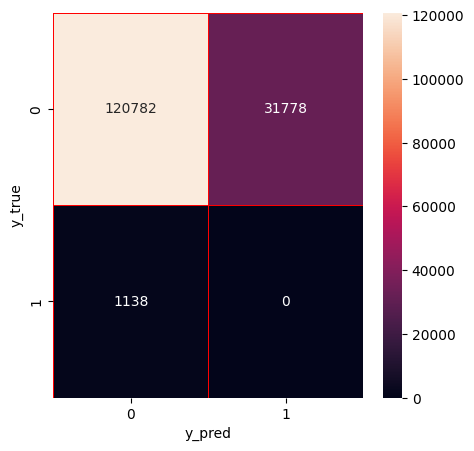

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_fscore_support, accuracy_score

# Evaluation metrics
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Print results
print('Accuracy of KSQL: ' + str(accuracy_score(y_true, y_pred)))
print('Precision of KSQL: ' + str(precision))
print('Recall of KSQL: ' + str(recall))
print('F1-score of KSQL: ' + str(fscore))
print(classification_report(y_true, y_pred, digits=5))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()